# Import the Data

In [1]:
import pandas as pd

df = pd.read_csv("data/stocks.csv")

In [2]:
df.head()

,Stock,return,adjusted_price,close_price,period_ending,fiscal_period,fiscal_year,current_ratio,quick_ratio,cash_ratio,...,price_earnings_ratio,price_to_free_cash_flows_ratio,price_to_operating_cash_flows_ratio,price_cash_flow_ratio,price_earnings_to_growth_ratio,price_sales_ratio,dividend_yield,enterprise_value_multiple,price_fair_value,interest_coverage
0,A,0.538447,157.059998,157.059998,2021-10-31,FY,2021,2.224239,1.738290,0.868852,...,39.459702,36.841235,32.152350,32.152350,0.557219,7.555980,0.004943,28.400719,8.859944,16.629630
1,A,-0.119126,138.350006,138.350006,2022-10-31,FY,2022,2.030091,1.472327,0.565825,...,32.987759,40.515818,31.529459,31.529459,6.251966,6.040691,0.006044,21.606143,7.797672,19.261905
2,A,-0.252837,103.370003,103.370003,2023-10-31,FY,2023,2.611354,1.968185,0.991890,...,24.508694,20.617897,17.150553,17.150553,34.230475,4.447648,0.008720,18.517780,5.199449,14.210526
3,A,0.260617,130.309998,130.309998,2024-10-31,FY,2024,2.089182,1.576253,0.701319,...,29.317223,27.523598,21.581896,21.581896,5.623576,5.804900,0.007251,26.781519,6.407240,15.500000
4,AAPL,0.308514,146.919998,146.919998,2021-09-25,FY,2021,1.074553,1.022115,0.278449,...,25.916254,26.397759,23.585141,23.585141,0.363486,6.707591,0.005896,21.253174,38.892865,41.190548


In [3]:
df_2 = pd.read_csv('data/companies_profile.csv')

In [4]:
df_2 = df_2[['symbol', 'sector', 'industry_category', 'stock_exchange']]

In [5]:
df_2.head()

,symbol,sector,industry_category,stock_exchange
0,A,Healthcare,Medical - Diagnostics & Research,New York Stock Exchange
1,AAPL,Technology,Consumer Electronics,NASDAQ Global Select
2,ABBV,Healthcare,Drug Manufacturers - General,New York Stock Exchange
3,ABEV,Consumer Defensive,Beverages - Alcoholic,New York Stock Exchange
4,ABNB,Consumer Cyclical,Travel Services,NASDAQ Global Select


In [6]:
df_merged = df.merge(df_2, left_on='Stock', right_on='symbol', how='left')
df_merged.drop('symbol', axis=1, inplace=True)

In [7]:
df_merged.head()

,Stock,return,adjusted_price,close_price,period_ending,fiscal_period,fiscal_year,current_ratio,quick_ratio,cash_ratio,...,price_cash_flow_ratio,price_earnings_to_growth_ratio,price_sales_ratio,dividend_yield,enterprise_value_multiple,price_fair_value,interest_coverage,sector,industry_category,stock_exchange
0,A,0.538447,157.059998,157.059998,2021-10-31,FY,2021,2.224239,1.738290,0.868852,...,32.152350,0.557219,7.555980,0.004943,28.400719,8.859944,16.629630,Healthcare,Medical - Diagnostics & Research,New York Stock Exchange
1,A,-0.119126,138.350006,138.350006,2022-10-31,FY,2022,2.030091,1.472327,0.565825,...,31.529459,6.251966,6.040691,0.006044,21.606143,7.797672,19.261905,Healthcare,Medical - Diagnostics & Research,New York Stock Exchange
2,A,-0.252837,103.370003,103.370003,2023-10-31,FY,2023,2.611354,1.968185,0.991890,...,17.150553,34.230475,4.447648,0.008720,18.517780,5.199449,14.210526,Healthcare,Medical - Diagnostics & Research,New York Stock Exchange
3,A,0.260617,130.309998,130.309998,2024-10-31,FY,2024,2.089182,1.576253,0.701319,...,21.581896,5.623576,5.804900,0.007251,26.781519,6.407240,15.500000,Healthcare,Medical - Diagnostics & Research,New York Stock Exchange
4,AAPL,0.308514,146.919998,146.919998,2021-09-25,FY,2021,1.074553,1.022115,0.278449,...,23.585141,0.363486,6.707591,0.005896,21.253174,38.892865,41.190548,Technology,Consumer Electronics,NASDAQ Global Select


In [8]:
df = df_merged.copy()

In [9]:
def growth (df, col_ratios):

    df = df.sort_values(by=["Stock", "fiscal_year"]).copy()
    df[col_ratios] = df.groupby("Stock")[col_ratios].transform(lambda x: x.fillna(x.mean()))

    def anual_growth (group):
        return group[col_ratios].pct_change(fill_method=None)
    
    df_gr = df.groupby("Stock", group_keys=False)[col_ratios].apply(anual_growth)
    df_gr = df_gr.add_suffix("_growth")
    df_gr = df_gr.groupby(df['Stock']).transform(lambda x: x.fillna(x.mean()))
    df = pd.concat([df, df_gr], axis=1)

    return df

In [10]:
growth_ratios = ['operating_cash_flow_per_share', 'free_cash_flow_per_share']

df = growth (df, growth_ratios)
df.head()

,Stock,return,adjusted_price,close_price,period_ending,fiscal_period,fiscal_year,current_ratio,quick_ratio,cash_ratio,...,price_sales_ratio,dividend_yield,enterprise_value_multiple,price_fair_value,interest_coverage,sector,industry_category,stock_exchange,operating_cash_flow_per_share_growth,free_cash_flow_per_share_growth
0,A,0.538447,157.059998,157.059998,2021-10-31,FY,2021,2.224239,1.738290,0.868852,...,7.555980,0.004943,28.400719,8.859944,16.629630,Healthcare,Medical - Diagnostics & Research,New York Stock Exchange,0.091211,0.071182
1,A,-0.119126,138.350006,138.350006,2022-10-31,FY,2022,2.030091,1.472327,0.565825,...,6.040691,0.006044,21.606143,7.797672,19.261905,Healthcare,Medical - Diagnostics & Research,New York Stock Exchange,-0.101724,-0.199017
2,A,-0.252837,103.370003,103.370003,2023-10-31,FY,2023,2.611354,1.968185,0.991890,...,4.447648,0.008720,18.517780,5.199449,14.210526,Healthcare,Medical - Diagnostics & Research,New York Stock Exchange,0.373579,0.468235
3,A,0.260617,130.309998,130.309998,2024-10-31,FY,2024,2.089182,1.576253,0.701319,...,5.804900,0.007251,26.781519,6.407240,15.500000,Healthcare,Medical - Diagnostics & Research,New York Stock Exchange,0.001779,-0.055673
4,AAPL,0.308514,146.919998,146.919998,2021-09-25,FY,2021,1.074553,1.022115,0.278449,...,6.707591,0.005896,21.253174,38.892865,41.190548,Technology,Consumer Electronics,NASDAQ Global Select,0.079666,0.092097


# Prepare the Data

In [11]:
from sklearn.preprocessing import OrdinalEncoder

unique_years = sorted(df["fiscal_year"].unique())
ordinal_encoder = OrdinalEncoder(categories=[unique_years])

In [12]:
ratios = [
    "net_profit_margin", "return_on_equity", "return_on_capital_employed",  # Profitability
    "asset_turnover",  # Eficciency
    "current_ratio", "debt_equity_ratio", "interest_coverage",  # Liquidity and Solvency
    "price_to_free_cash_flows_ratio", "price_earnings_ratio", "price_book_value_ratio",  # Valuation
    'operating_cash_flow_per_share_growth', 'free_cash_flow_per_share_growth','price_earnings_to_growth_ratio'  # Growth
] 

dividend_ratios = ['dividend_yield']

new_columns = ratios + dividend_ratios + ['fiscal_year']

In [13]:
df = df[new_columns]

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from scipy.stats.mstats import winsorize
import numpy as np

def preprocess_column(X):
    X_log = np.log1p(X - X.min() + 1)  
    X_wins = winsorize(X_log, limits=(0.04, 0.04), axis=0)  
    return np.array(X_wins)

ratio_pipeline = make_pipeline(KNNImputer(n_neighbors=5) ,FunctionTransformer(preprocess_column, feature_names_out="one-to-one"), 
                               StandardScaler())

dividend_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value=0) ,FunctionTransformer(preprocess_column, feature_names_out="one-to-one"), 
                               StandardScaler())

ord_pipeline = make_pipeline(ordinal_encoder) 

preprocessing = ColumnTransformer([
        ("log_wins_sc", ratio_pipeline, ratios),
        ("log_wins_sc_", dividend_pipeline, dividend_ratios),
        ("ord", ord_pipeline, ['fiscal_year']),
    ],
    remainder='passthrough')

In [37]:
preprocessed = preprocessing.fit_transform(df)

In [38]:
preprocessed.shape

(3357, 15)

In [39]:
feature_names = preprocessing.get_feature_names_out()

df_preprocessed = pd.DataFrame(preprocessed, columns=feature_names)

df_preprocessed.head()

,log_wins_sc__net_profit_margin,log_wins_sc__return_on_equity,log_wins_sc__return_on_capital_employed,log_wins_sc__asset_turnover,log_wins_sc__current_ratio,log_wins_sc__debt_equity_ratio,log_wins_sc__interest_coverage,log_wins_sc__price_to_free_cash_flows_ratio,log_wins_sc__price_earnings_ratio,log_wins_sc__price_book_value_ratio,log_wins_sc__operating_cash_flow_per_share_growth,log_wins_sc__free_cash_flow_per_share_growth,log_wins_sc__price_earnings_to_growth_ratio,log_wins_sc___dividend_yield,ord__fiscal_year
0,0.482582,0.256479,0.354353,0.025594,-0.095208,-0.412966,-0.028629,0.470309,0.484559,0.438737,0.017396,0.055841,0.164729,-0.726774,1.0
1,0.422134,0.301382,0.680433,0.156846,-0.149929,-0.401217,0.053377,0.580511,0.306216,0.295205,-0.248736,-0.174941,2.235540,-0.671957,2.0
2,0.410236,0.209549,0.333694,0.123227,0.013901,-0.442026,-0.103995,-0.016262,0.072556,-0.055864,0.406890,0.394971,2.423098,-0.538801,3.0
3,0.529667,0.233808,0.352727,-0.063623,-0.133275,-0.361335,-0.063822,0.190859,0.205067,0.107332,-0.105966,-0.052508,2.007039,-0.611876,4.0
4,0.969038,2.672796,2.483591,1.015447,-0.419252,0.838751,0.736496,0.157093,0.111345,3.459319,0.001471,0.073705,0.094280,-0.679308,1.0


# K-Means

In [18]:
clustering_df = df_preprocessed.copy()

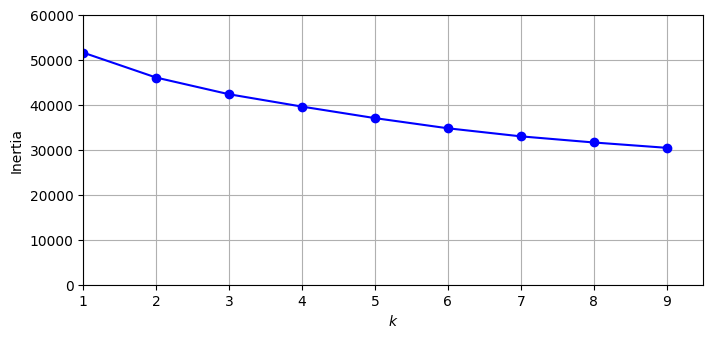

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_per_k = [KMeans(n_clusters=k, n_init=30, random_state=42).fit(clustering_df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 9.5, 0, 60000])
plt.grid()
plt.show()

In [20]:
inertias

[51678.50997914809,
 46125.90351906436,
 42405.27556103006,
 39657.106120817974,
 37092.71704549817,
 34827.759924900754,
 33033.02055312705,
 31669.231905082597,
 30478.881742229263]

In [21]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)  # Evaluate from 2 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
    labels = kmeans.fit_predict(clustering_df)
    score = silhouette_score(clustering_df, labels)
    silhouette_scores.append(score)

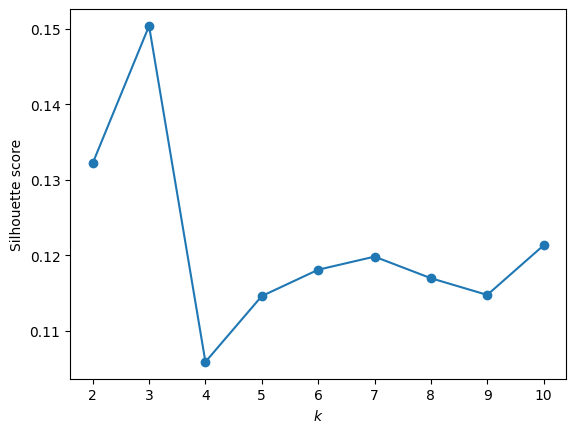

In [22]:
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.show()

In [23]:
stocks = df_merged['Stock'].to_list()
sectors = df_merged['sector'].to_list()
y_pred = KMeans(n_clusters=3, n_init=30, random_state=42).fit_predict(clustering_df)

In [24]:
df_clusters = pd.DataFrame({'Stock': stocks, 'sector': sectors, 'cluster': y_pred})
df_clusters.sort_values(by="cluster", inplace=True)
df_clusters= df_clusters.reset_index(drop=True)
df_clusters.head()

,Stock,sector,cluster
0,CVNA,Consumer Cyclical,0
1,RKUNY,Consumer Cyclical,0
2,BEKE,Real Estate,0
3,BEKE,Real Estate,0
4,RKUNY,Consumer Cyclical,0


In [25]:
clusters_count = df_clusters.groupby(["cluster", "sector"]).size().reset_index(name="Qty")
clusters_count

,cluster,sector,Qty
0,0,Basic Materials,12
1,0,Communication Services,33
2,0,Consumer Cyclical,61
3,0,Consumer Defensive,10
4,0,Energy,15
5,0,Financial Services,30
6,0,Healthcare,44
7,0,Industrials,26
8,0,Real Estate,12
9,0,Technology,120


# DBSCAN

In [173]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=15)
dbscan.fit(df_preprocessed)

DBSCAN(eps=1, min_samples=15)

In [174]:
dbscan.labels_

array([ 0, -1, -1, ..., -1, -1, -1])

In [175]:
len(np.unique(dbscan.labels_))

4

In [183]:
unique_labels, counts = np.unique(dbscan.labels_, return_counts=True)

for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"Anomalies: {count}")
    else:
        print(f"Cluster {label}: {count}")

Anomalies: 247
Cluster 0: 3054
Cluster 1: 56


In [177]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(df_preprocessed)

In [178]:
dbscan = DBSCAN(eps=1, min_samples=30)
dbscan.fit(X_reduced)

DBSCAN(eps=1, min_samples=30)

In [179]:
len(np.unique(dbscan.labels_))

3

In [184]:
unique_labels, counts = np.unique(dbscan.labels_, return_counts=True)

for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"Anomalies: {count}")
    else:
        print(f"Cluster {label}: {count}")

Anomalies: 247
Cluster 0: 3054
Cluster 1: 56


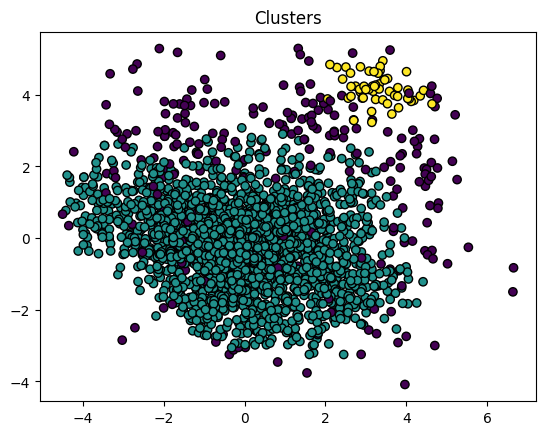

In [185]:
import matplotlib.pyplot as plt

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan.labels_, cmap="viridis", edgecolors='k')
plt.title("Clusters")
plt.show()